In [9]:
# required libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# create data points
X = np.array([[1,2], [1,4], [1,0],
            [10,2], [10,4], [10,0]])
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

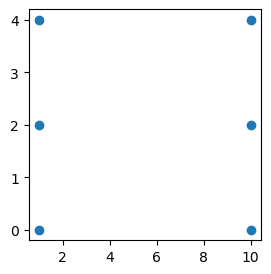

In [6]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],X[:,1])

In [7]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [11]:
pred = kmeans.predict(X)
pred

array([0, 2, 0, 1, 1, 1])

In [12]:
import pandas as pd

In [15]:
df_X = pd.DataFrame(X)
df_X.columns = ['x1','x2']
df_X

,x1,x2
0,1,2
1,1,4
2,1,0
3,10,2
4,10,4
5,10,0


In [17]:
df_y = pd.DataFrame(pred)
df_y.columns = ['cluster label']
df_y

,cluster label
0,0
1,2
2,0
3,1
4,1
5,1


In [18]:
df_X['new_cluster'] = df_y
df_X

,x1,x2,new_cluster
0,1,2,0
1,1,4,2
2,1,0,0
3,10,2,1
4,10,4,1
5,10,0,1


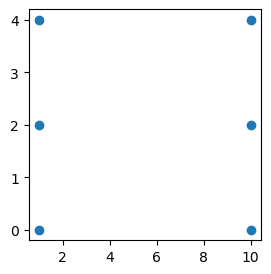

In [20]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],X[:,1])

In [23]:
for i in range(1,6):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X)
    print(f'k={i}')
    print(kmeans.cluster_centers_)
    print('*'*15)

k=1
[[5.5 2. ]]
***************
k=2
[[ 1.  2.]
 [10.  2.]]
***************
k=3
[[ 1.  1.]
 [10.  2.]
 [ 1.  4.]]
***************
k=4
[[ 1.  1.]
 [10.  1.]
 [ 1.  4.]
 [10.  4.]]
***************
k=5
[[ 1.  0.]
 [10.  1.]
 [ 1.  4.]
 [10.  4.]
 [ 1.  2.]]
***************


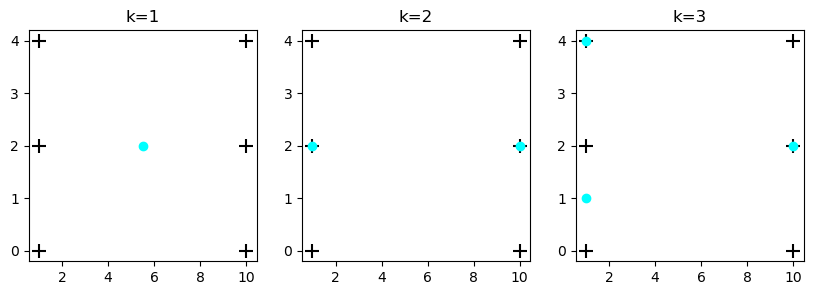

In [37]:
fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(131)
ax1.scatter(X[:,0],X[:,1], marker='+', c= 'black', s=100)
ax1.scatter(5.5, 2, marker='o', c='cyan')
ax1.set_title('k=1')

ax1 = fig.add_subplot(132)
ax1.scatter(X[:,0],X[:,1], marker='+',c= 'black', s=100)
ax1.scatter(1, 2, marker='o', c='cyan')
ax1.scatter(10, 2, marker='o', c='cyan')
ax1.set_title('k=2')

ax1 = fig.add_subplot(133)
ax1.scatter(X[:,0],X[:,1], marker='+',c= 'black', s=100)
ax1.scatter(1, 1, marker='o', c='cyan')
ax1.scatter(10, 2, marker='o', c='cyan')
ax1.scatter(1, 4, marker='o', c='cyan')
ax1.set_title('k=3')

plt.show()

In [42]:
df_X

,x1,x2,new_cluster,cl=2
0,1,2,0,0
1,1,4,2,0
2,1,0,0,0
3,10,2,1,1
4,10,4,1,1
5,10,0,1,1


In [38]:
res = []
for i in range(1,6):
    kmeans = KMeans(n_clusters = i, random_state=42, init='random'/'kmeans++')
    kmeans.fit(X)
    res.append(kmeans.inertia_)
    

In [46]:
res
# inertia 
#sum of square of the distance b/w data points and their respective cluster centroids

[137.5, 16.0, 10.0, 4.0, 2.0]

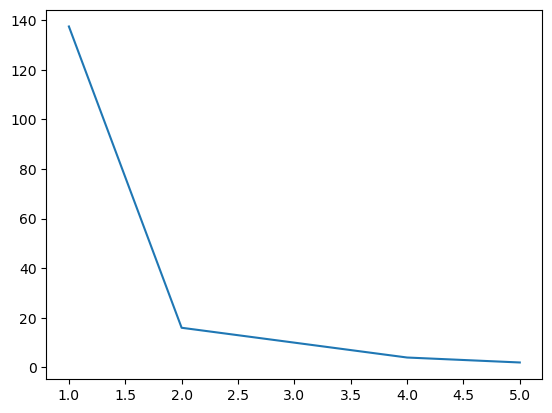

In [39]:
plt.plot(range(1,6),res)
plt.show()

In [40]:
# optimal k = 2

kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [41]:
pred = kmeans.predict(X)
df_X['cl=2'] = pred
df_X

,x1,x2,new_cluster,cl=2
0,1,2,0,0
1,1,4,2,0
2,1,0,0,0
3,10,2,1,1
4,10,4,1,1
5,10,0,1,1


In [44]:
kmeans.predict([[1,1]])

array([0])

In [45]:
kmeans.predict([[14,4]])

array([1])